In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df=sns.load_dataset('titanic')

In [53]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [54]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [56]:
df.isnull().sum()/len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [57]:
df.drop(columns='deck',inplace=True)

In [58]:
df['embark_town']=df.embark_town.fillna(value=df['embark_town'].mode()[0])

In [59]:
df.isnull().sum()/len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
embark_town     0.000000
alive           0.000000
alone           0.000000
dtype: float64

<Axes: xlabel='sex', ylabel='age'>

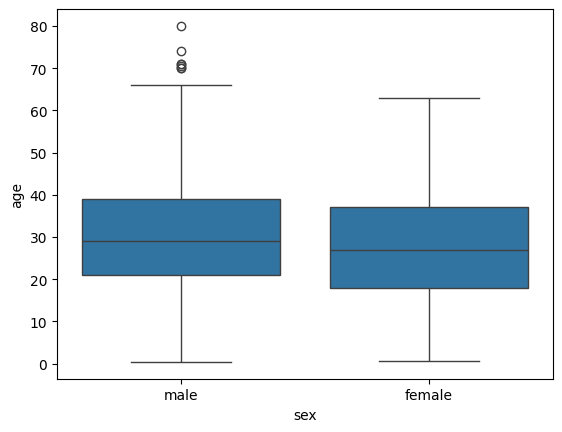

In [60]:
import seaborn as sns

sns.boxplot(data=df,y='age',x='sex')

In [61]:
# IQR Method
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR=Q3-Q1
IQR
# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]


In [62]:
df.shape

(703, 14)

In [63]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [64]:
# IQR Method
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR=Q3-Q1
IQR
# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['fare'] > lower_bound) & (df['fare'] < upper_bound)]

In [65]:
df.shape

(607, 14)

# finding duplicates

In [66]:
df.shape

(607, 14)

In [67]:

#finding duplicates
df.duplicated().sum()


np.int64(38)

In [68]:
df1=df[df.duplicated()]
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
133,1,2,female,29.0,1,0,26.0000,S,Second,woman,False,Southampton,yes,False
173,0,3,male,21.0,0,0,7.9250,S,Third,man,True,Southampton,no,True
213,0,2,male,30.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
313,0,3,male,28.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
320,0,3,male,22.0,0,0,7.2500,S,Third,man,True,Southampton,no,True


In [69]:
df1.shape

(38, 14)

In [70]:
df.drop_duplicates(inplace=True)

In [71]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True


In [48]:
df.shape

(569, 14)

# Data Normalization

In [105]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#DATA
df

#select columns to normalize
cols_to_normalize=['age','fare']

#create the scaler function/tool
scaler=MinMaxScaler()

#fit and transform tha data on scaler 
df[cols_to_normalize]=scaler.fit_transform(df[cols_to_normalize])

#check the data
df


,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,0.339415,1,0,0.104618,S,Third,man,True,Southampton,no,False,1
2,1,3,female,0.402328,0,0,0.114358,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.543882,1,0,0.766234,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.543882,0,0,0.116162,S,Third,man,True,Southampton,no,True,0
6,0,1,male,0.842718,0,0,0.748377,S,First,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,0.433784,0,0,0.151515,S,Second,man,True,Southampton,no,True,0
885,0,3,female,0.606795,0,5,0.420274,Q,Third,woman,False,Queenstown,no,False,5
887,1,1,female,0.292230,0,0,0.432900,S,First,woman,False,Southampton,yes,True,0
889,1,1,male,0.402328,0,0,0.432900,C,First,man,True,Cherbourg,yes,True,0


In [25]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,2.428822,0.438262,0.521968,0.428822,0.277857
std,0.483918,0.742767,0.214231,0.980420,0.873482,0.205351
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.307958,0.000000,0.000000,0.114358
50%,0.000000,3.000000,0.433784,0.000000,0.000000,0.187590
75%,1.000000,3.000000,0.559610,1.000000,1.000000,0.380772
max,1.000000,3.000000,1.000000,5.000000,6.000000,1.000000


In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

#DATA
df

#select columns to normalize
cols_to_normalize=['age','fare']

#create the scaler function/tool
scaler=StandardScaler()

#fit and transform tha data on scaler 
df[cols_to_normalize]=scaler.fit_transform(df[cols_to_normalize])

#check the data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.461812,1,0,-0.844366,S,Third,man,True,Southampton,no,False
2,1,3,female,-0.167885,0,0,-0.796892,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.493452,1,0,2.380346,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.493452,0,0,-0.788101,S,Third,man,True,Southampton,no,True
6,0,1,male,1.889606,0,0,2.293310,S,First,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,-0.020921,0,0,-0.615788,S,Second,man,True,Southampton,no,True
885,0,3,female,0.787379,0,5,0.694141,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,-0.682257,0,0,0.755682,S,First,woman,False,Southampton,yes,True
889,1,1,male,-0.167885,0,0,0.755682,C,First,man,True,Cherbourg,yes,True


In [50]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,0.372583,2.428822,0.000000,0.521968,0.428822,2.122887e-16
std,0.483918,0.742767,1.000880,0.980420,0.873482,1.000880e+00
min,0.000000,1.000000,-2.047549,0.000000,0.000000,-1.354271e+00
25%,0.000000,2.000000,-0.608775,0.000000,0.000000,-7.968920e-01
50%,0.000000,3.000000,-0.020921,0.000000,0.000000,-4.399583e-01
75%,1.000000,3.000000,0.566933,1.000000,1.000000,5.016083e-01
max,1.000000,3.000000,2.624423,5.000000,6.000000,3.519720e+00


# Log Transformation

In [84]:
titanic=sns.load_dataset('titanic')
titanic.info()           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [85]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [86]:
import numpy as np
titanic['age']=titanic.age.fillna(titanic['age'].mean())
titanic['fare']=titanic.fare.fillna(titanic['fare'].mean())

titanic['age']=np.log(titanic['age'])
titanic['fare']=np.log(titanic['fare'])
titanic.head()




c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='fare'>

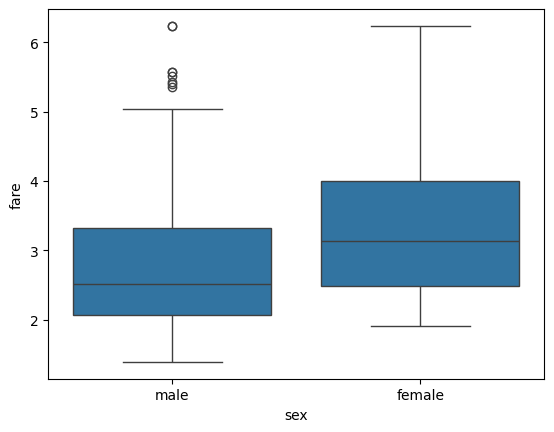

In [89]:
sns.boxplot(data=titanic,x='sex',y='fare')

<Axes: xlabel='age', ylabel='Count'>

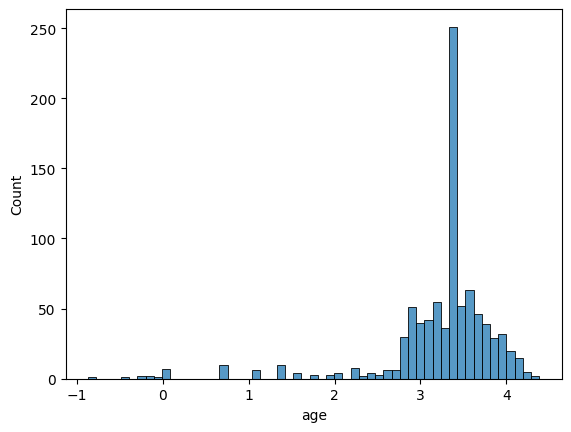

In [90]:
sns.histplot(titanic['age'])

In [93]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

# Organizing the Data

In [92]:
df['family_size']=df['sibsp']+df['parch']

<Axes: xlabel='family_size', ylabel='Count'>

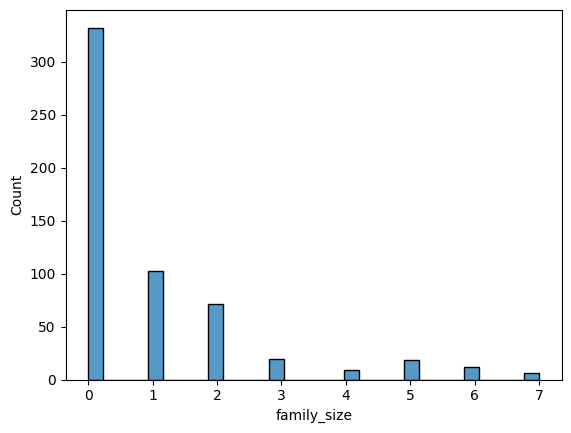

In [94]:
sns.histplot(df['family_size'])

<Axes: xlabel='sex', ylabel='age'>

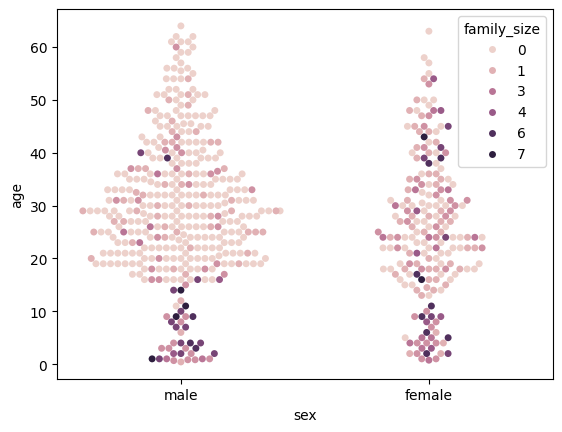

In [96]:
sns.swarmplot(data=df,x='sex',y='age',hue='family_size')

In [98]:
df=df.rename(columns={'survived':'survival'})
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

In [102]:
table=pd.pivot_table(df,values='fare',index='sex',
columns='survival',aggfunc=np.mean)
table

C:\Users\dell\AppData\Local\Temp\ipykernel_8916\1735143347.py:1: FutureWarning: The provided callable <function mean at 0x000002D2C3D71080> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table=pd.pivot_table(df,values='fare',index='sex',


survival,0,1
sex,,
female,18.617744,23.748582
male,16.458006,22.608984


<Axes: xlabel='fare', ylabel='age'>

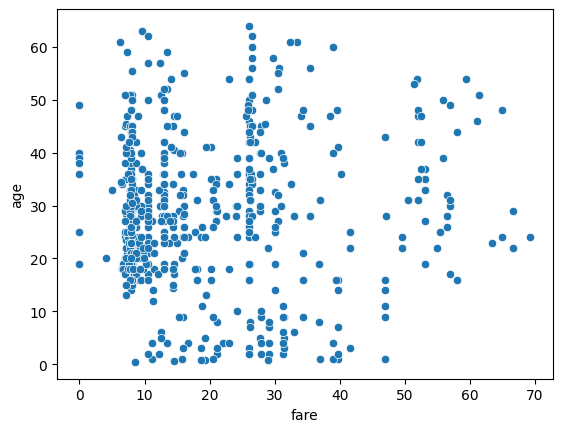

In [103]:
sns.scatterplot(data=df,x='fare',y='age')

In [106]:
df['family_size']=df['sibsp']+df['parch']

In [107]:
df.head()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,0.339415,1,0,0.104618,S,Third,man,True,Southampton,no,False,1
2,1,3,female,0.402328,0,0,0.114358,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.543882,1,0,0.766234,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.543882,0,0,0.116162,S,Third,man,True,Southampton,no,True,0
6,0,1,male,0.842718,0,0,0.748377,S,First,man,True,Southampton,no,True,0


# saving the wrangle data

In [108]:
df.to_csv('wrangled_data.csv')